In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow warnings (if using TF)
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Specify GPU if needed

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import os
os.listdir("/kaggle/input/mtsamplesdataset")

['mtsamples.csv']

In [5]:
data = pd.read_csv("/kaggle/input/mtsamplesdataset/mtsamples.csv")

In [6]:
data.columns

Index(['description', 'medical_specialty', 'sample_name', 'transcription',
       'keywords'],
      dtype='object')

In [7]:
data.head(5)

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [9]:
data.describe()

,description,medical_specialty,sample_name,transcription,keywords
count,4999,4999,4999,4966,3931
unique,2348,40,2377,2357,3849
top,An example/template for a routine normal male...,Surgery,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO...",
freq,12,1103,5,5,81


In [10]:
data = data[['transcription', 'medical_specialty','keywords']]
print(len(data[data['transcription'].isna()]))
print("Before dropping na values", data.shape)
data = data.drop(data[data['transcription'].isna()].index)
print("After dropping na values", data.shape)

33
Before dropping na values (4999, 3)
After dropping na values (4966, 3)


In [11]:
categories = data.groupby(data['medical_specialty'])
for name, value in categories:
    print(name, len(value))

 Allergy / Immunology 7
 Autopsy 8
 Bariatrics 18
 Cardiovascular / Pulmonary 371
 Chiropractic 14
 Consult - History and Phy. 516
 Cosmetic / Plastic Surgery 27
 Dentistry 27
 Dermatology 29
 Diets and Nutritions 10
 Discharge Summary 108
 ENT - Otolaryngology 96
 Emergency Room Reports 75
 Endocrinology 19
 Gastroenterology 224
 General Medicine 259
 Hematology - Oncology 90
 Hospice - Palliative Care 6
 IME-QME-Work Comp etc. 16
 Lab Medicine - Pathology 8
 Letters 23
 Nephrology 81
 Neurology 223
 Neurosurgery 94
 Obstetrics / Gynecology 155
 Office Notes 50
 Ophthalmology 83
 Orthopedic 355
 Pain Management 61
 Pediatrics - Neonatal 70
 Physical Medicine - Rehab 21
 Podiatry 47
 Psychiatry / Psychology 53
 Radiology 273
 Rheumatology 10
 SOAP / Chart / Progress Notes 166
 Sleep Medicine 20
 Speech - Language 9
 Surgery 1088
 Urology 156


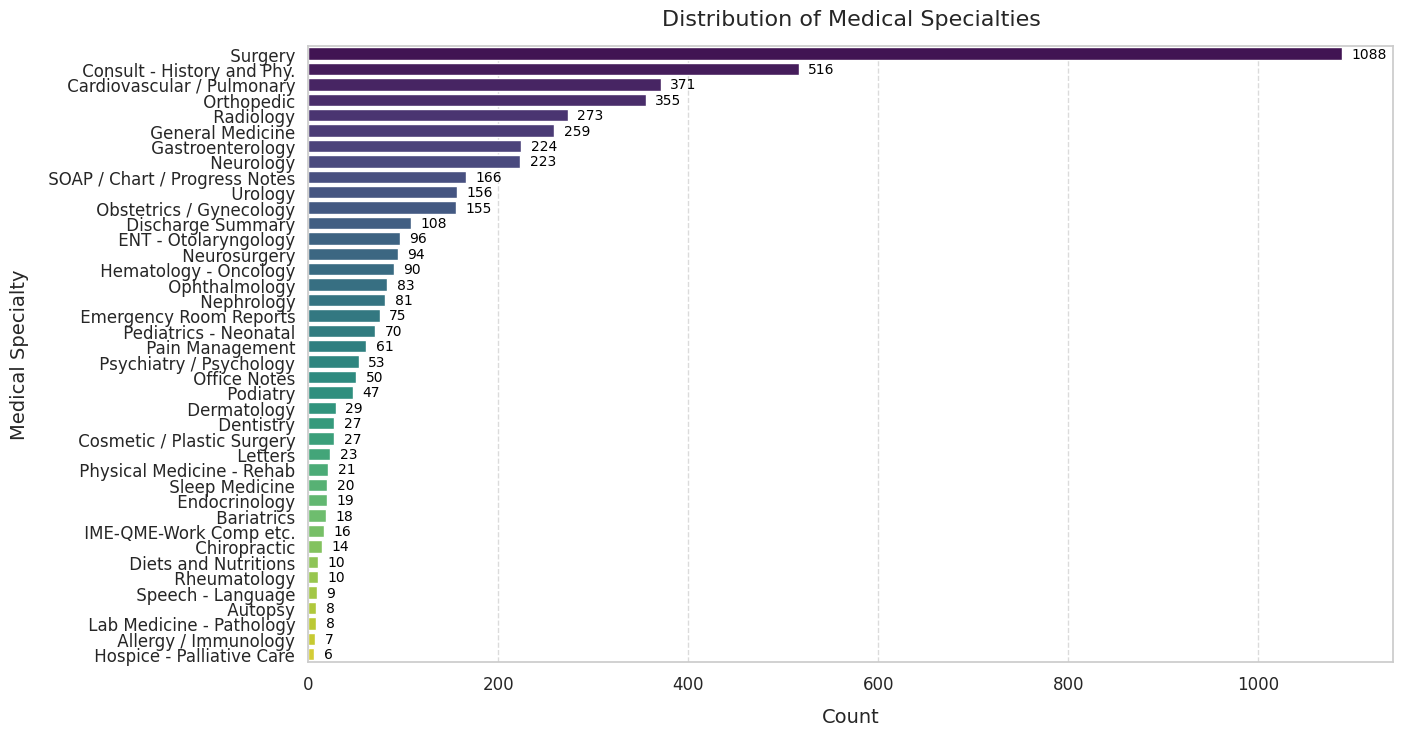

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
specialty_counts = data["medical_specialty"].value_counts()
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

colors = sns.color_palette("viridis", len(specialty_counts))
ax = sns.barplot(
    y=specialty_counts.index,
    x=specialty_counts.values,
    palette=colors
)

for i, v in enumerate(specialty_counts.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=10, color='black')
plt.xlabel("Count", fontsize=14, labelpad=10)
plt.ylabel("Medical Specialty", fontsize=14, labelpad=10)
plt.title("Distribution of Medical Specialties", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

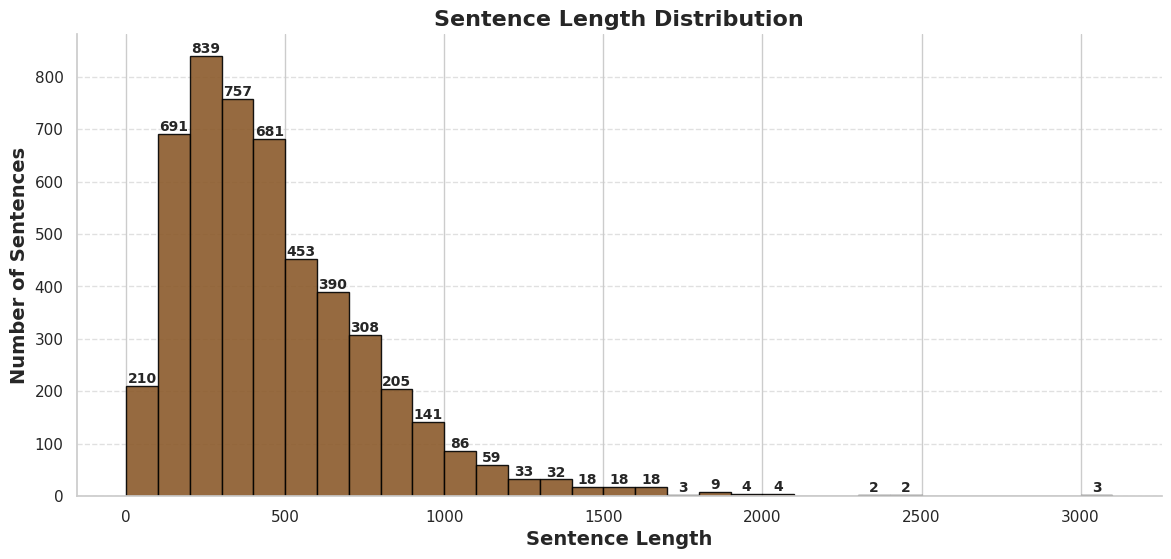

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create sentence_length column by counting number of words in each transcription
data["sentence_length"] = data["transcription"].apply(lambda x: len(x.split()))

# Assuming `sentence_lengths` is your dataset column
sentence_lengths = data["sentence_length"]

# Set the visualization style
sns.set_style("whitegrid")

# Define bin width and range based on data statistics
bin_width = 100  # Adjust bin width for better grouping
bins = np.arange(0, sentence_lengths.max() + bin_width, bin_width)

# Create the figure
plt.figure(figsize=(14, 6))

# Plot histogram
n, bins, patches = plt.hist(sentence_lengths, bins=bins, color="#8B5A2B", edgecolor="black", alpha=0.9)

# Annotate each bar with count values
for i in range(len(n)):
    if n[i] > 0:  # Label only non-zero bars
        plt.text(bins[i] + bin_width/2, n[i], str(int(n[i])), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel("Sentence Length", fontsize=14, fontweight='bold')
plt.ylabel("Number of Sentences", fontsize=14, fontweight='bold')
plt.title("Sentence Length Distribution", fontsize=16, fontweight='bold')

# Remove unnecessary spines for a cleaner look
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [14]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure you have the necessary resources
nltk.download('punkt_tab')
nltk.download('stopwords')

# Function for text cleaning & normalization
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
        text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

# Apply cleaning to transcription column
data["transcription"] = data["transcription"].apply(clean_text)

data['keywords'] = data['keywords'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)))

# Load stopwords
stop_words = set(stopwords.words("english"))

# Function to remove stopwords
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

# Apply stopword removal
data["transcription"] = data["transcription"].apply(remove_stopwords)

data.to_csv("/kaggle/working/mtsamples_cleaned.csv", index=False)

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Tokenize only (no stopword removal)
def tokenize_text(text):
    return word_tokenize(text)

# Apply to your 'transcription' column
data["tokens"] = data["transcription"].apply(tokenize_text)
print(data["tokens"].head())

0    [subjective, yearold, white, female, presents,...
1    [past, medical, history, difficulty, climbing,...
2    [history, present, illness, seen, abc, today, ...
3    [mmode, left, atrial, enlargement, left, atria...
4    [left, ventricular, cavity, size, wall, thickn...
Name: tokens, dtype: object


In [16]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize text
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    return " ".join(lemmatized)

# Apply to the transcription column
data["lemmatized_transcription"] = data["transcription"].apply(lemmatize_text)

In [17]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem the text
def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return " ".join(stemmed_words)

# Apply stemming to the transcription column
data["stemmed_transcription"] = data["transcription"].apply(stem_text)

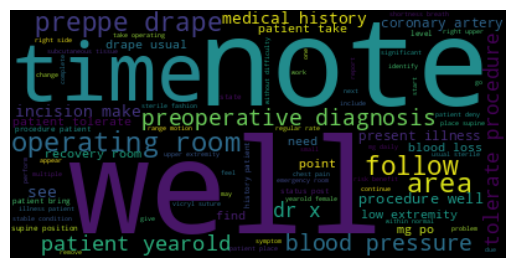

In [18]:
from wordcloud import WordCloud
def wordcloud(data):
    wordcloud_ent = WordCloud().generate(' '.join(data['lemmatized_transcription']))
    plt.imshow(wordcloud_ent, interpolation='bilinear')
    plt.axis("off")
    return plt.show()
wordcloud(data)

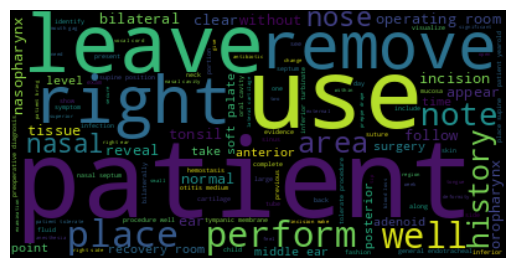

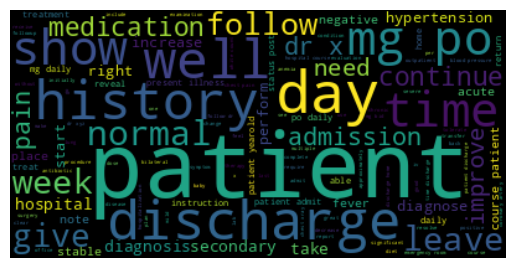

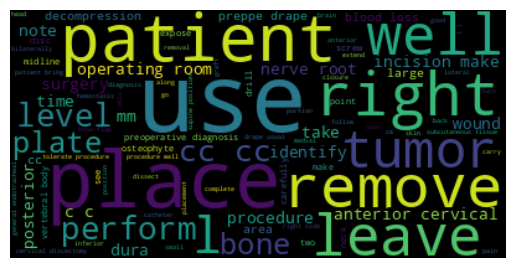

In [19]:
df_ent =data.loc[(data['medical_specialty'] == ' ENT - Otolaryngology')]
df_dc =data.loc[(data['medical_specialty'] == ' Discharge Summary')]
df_neu =data.loc[(data['medical_specialty'] == ' Neurosurgery')]
wordcloud(df_ent)
wordcloud(df_dc)
wordcloud(df_neu)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform text data into BoW representation
bow_matrix = vectorizer.fit_transform(data["transcription"])

# Convert BoW matrix to DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print shape (rows = samples, columns = unique words)
print("BoW Matrix Shape:", bow_df.shape)

BoW Matrix Shape: (4966, 36736)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform text data into TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(data["transcription"])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print shape
print("TF-IDF Matrix Shape:", tfidf_df.shape)

TF-IDF Matrix Shape: (4966, 36736)


In [22]:
# Get feature names
bow_features = vectorizer.get_feature_names_out()
tfidf_features = tfidf_vectorizer.get_feature_names_out()

# Get highest-weighted words in BoW
bow_word_importance = np.asarray(bow_matrix.sum(axis=0)).flatten()
top_bow_words = sorted(zip(bow_word_importance, bow_features), reverse=True)[:10]
print("Top 10 Words in BoW:", top_bow_words)

# Get highest-weighted words in TF-IDF
tfidf_word_importance = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
top_tfidf_words = sorted(zip(tfidf_word_importance, tfidf_features), reverse=True)[:10]
print("Top 10 Words in TF-IDF:", top_tfidf_words)

Top 10 Words in BoW: [(21920, 'patient'), (11137, 'right'), (10776, 'left'), (8264, 'history'), (6962, 'placed'), (6804, 'normal'), (5883, 'well'), (5491, 'pain'), (5077, 'procedure'), (4317, 'also')]
Top 10 Words in TF-IDF: [(256.7582479196366, 'patient'), (170.28621061598886, 'right'), (163.5151316306532, 'left'), (149.29366586732607, 'history'), (126.21767165105493, 'normal'), (116.3193922127756, 'placed'), (107.19865115400083, 'pain'), (103.05181393548484, 'mg'), (101.19382666578471, 'procedure'), (89.49375425324727, 'well')]


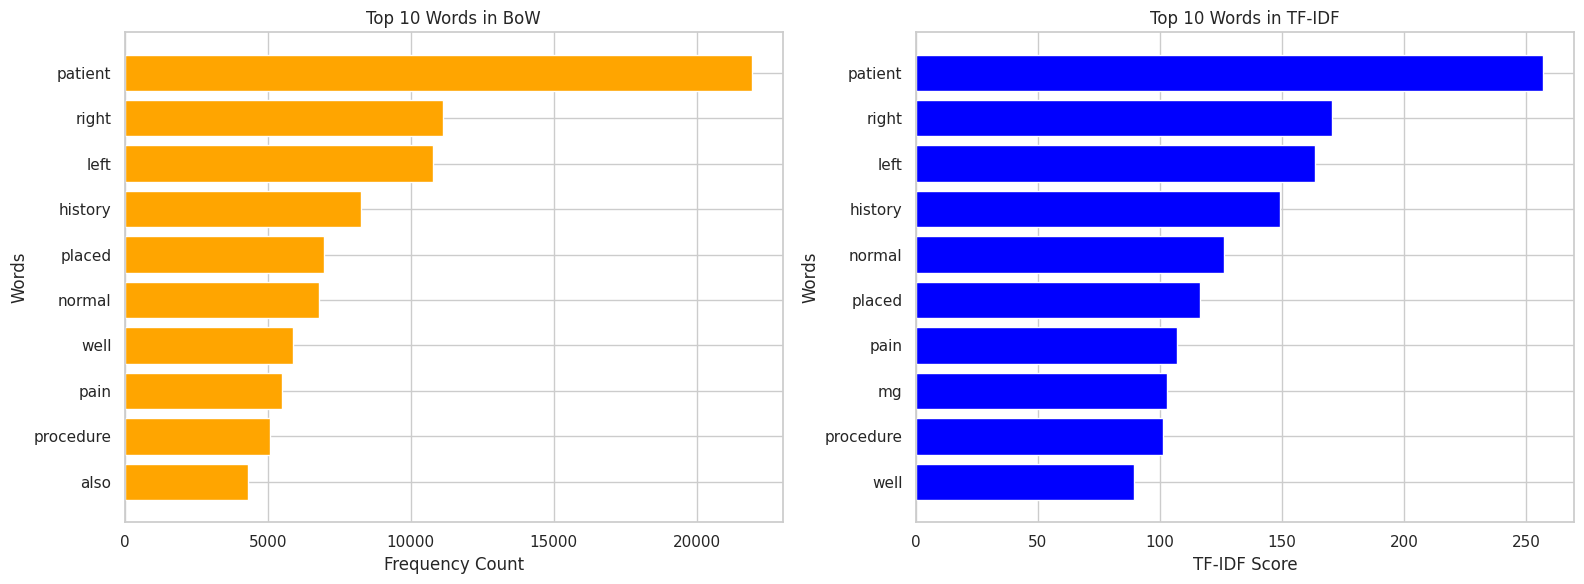

In [23]:
# Unzip the sorted word-importance pairs
bow_importance, bow_words = zip(*top_bow_words)
tfidf_importance, tfidf_words = zip(*top_tfidf_words)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for BoW
axes[0].barh(bow_words[::-1], bow_importance[::-1], color="orange")  # Reverse for better readability
axes[0].set_title("Top 10 Words in BoW")
axes[0].set_xlabel("Frequency Count")
axes[0].set_ylabel("Words")

# Bar plot for TF-IDF
axes[1].barh(tfidf_words[::-1], tfidf_importance[::-1], color="blue")  # Reverse for better readability
axes[1].set_title("Top 10 Words in TF-IDF")
axes[1].set_xlabel("TF-IDF Score")
axes[1].set_ylabel("Words")

plt.tight_layout()
plt.show()

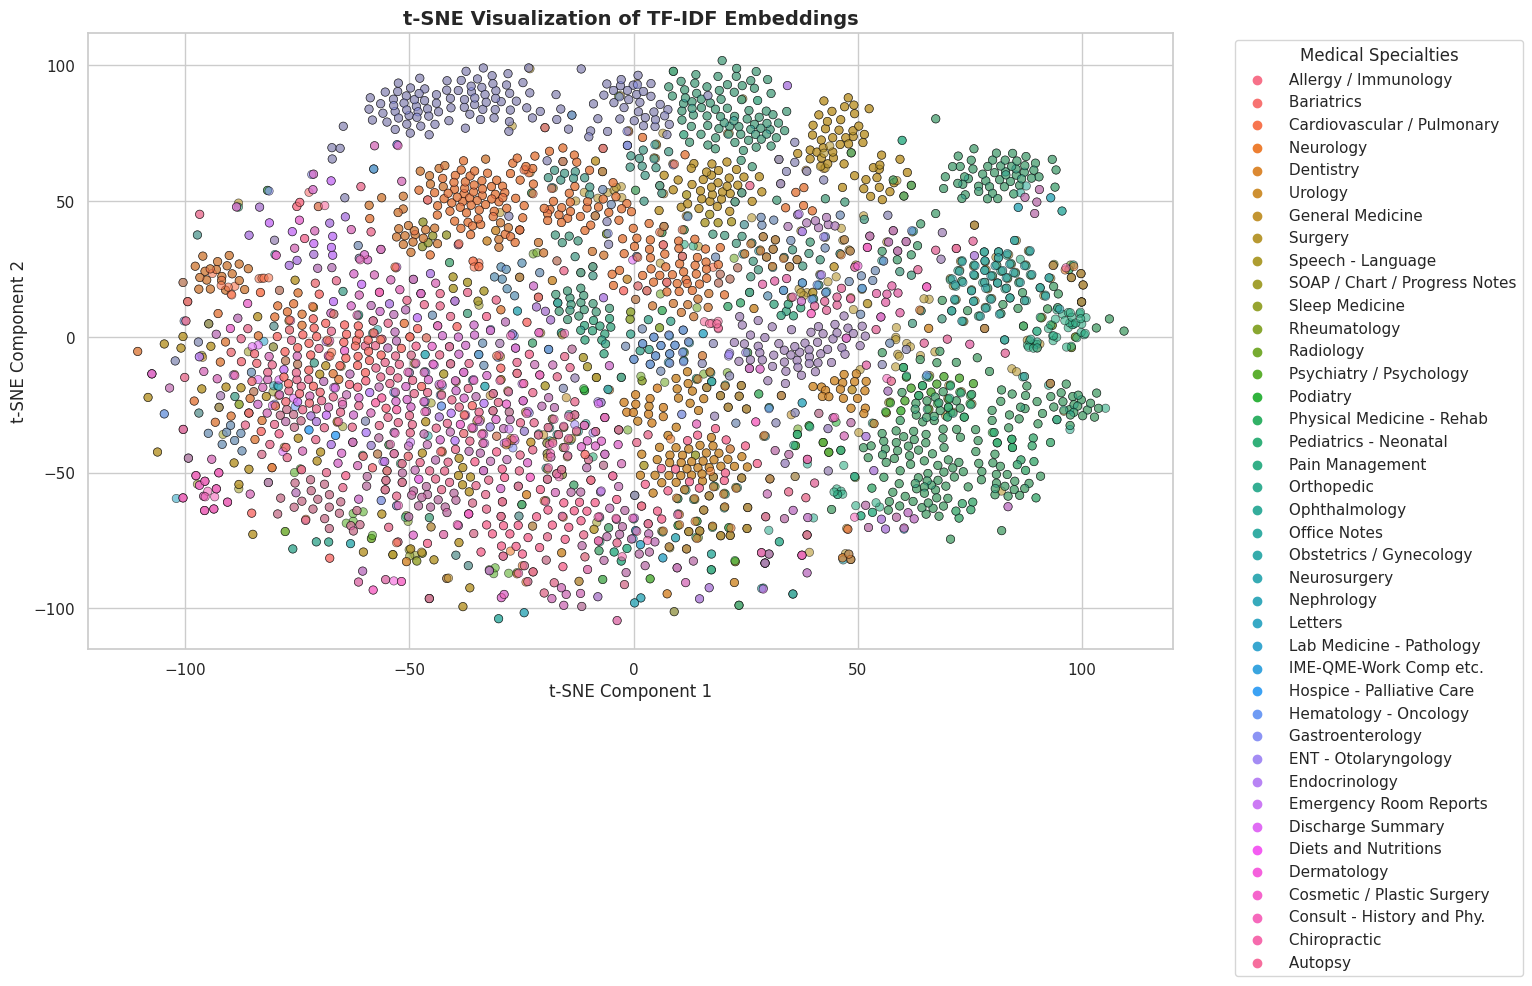

In [24]:
import gc
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Garbage collection to free memory
gc.collect()

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data["transcription"])  # Use your dataset column

# Convert TF-IDF matrix to dense format for t-SNE
tfidf_dense = tfidf_matrix.toarray()

# Extract labels for coloring
labels = data['medical_specialty'].tolist()

# Apply t-SNE
tsne_results = TSNE(n_components=2, init='random', random_state=0, perplexity=40).fit_transform(tfidf_dense)

# Plot t-SNE results
plt.figure(figsize=(14, 8))
palette = sns.color_palette("husl", len(set(labels)))  # Generate unique colors per class

sns.scatterplot(
    x=tsne_results[:, 0], 
    y=tsne_results[:, 1],
    hue=labels,
    palette=palette,
    alpha=0.6,  # Make points slightly transparent for better visibility
    edgecolor='black'  # Add borders to points
)

plt.title("t-SNE Visualization of TF-IDF Embeddings", fontsize=14, fontweight='bold')
plt.xlabel("t-SNE Component 1", fontsize=12)
plt.ylabel("t-SNE Component 2", fontsize=12)
plt.legend(title="Medical Specialties", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside

# Show plot
plt.show()

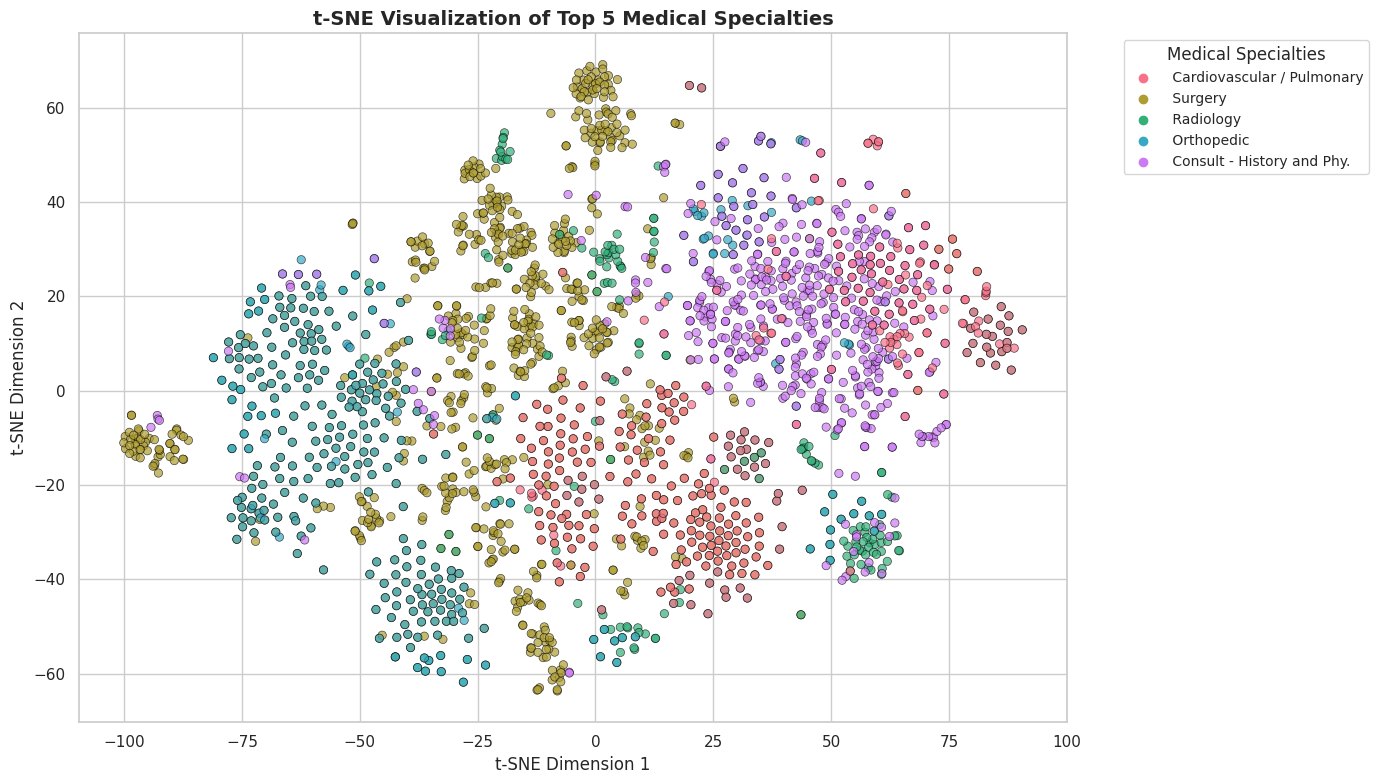

In [25]:
# Garbage collection to free memory
gc.collect()

# Identify Top 5 Medical Specialties
top_5_specialties = data['medical_specialty'].value_counts().index[:5]
filtered_data = data[data['medical_specialty'].isin(top_5_specialties)]

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_data["transcription"])  # Use filtered dataset

# Convert TF-IDF matrix to dense format for t-SNE
tfidf_dense = tfidf_matrix.toarray()

# Extract labels for coloring
labels = filtered_data['medical_specialty'].tolist()

# Apply t-SNE
tsne_results = TSNE(n_components=2, init='random', random_state=0, perplexity=40).fit_transform(tfidf_dense)

# Plot t-SNE results
plt.figure(figsize=(14, 8))
palette = sns.color_palette("husl", len(top_5_specialties))  # Generate unique colors for top 5 categories

sns.scatterplot(
    x=tsne_results[:, 0], 
    y=tsne_results[:, 1],
    hue=labels,
    palette=palette,
    alpha=0.7,  # Make points slightly transparent for better visibility
    edgecolor='black'  # Add borders to points
)

# Customize Titles and Labels
plt.title('t-SNE Visualization of Top 5 Medical Specialties', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)

# Adjust Legend
plt.legend(title="Medical Specialties", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Optimize Layout
plt.tight_layout()

# Show plot
plt.show()

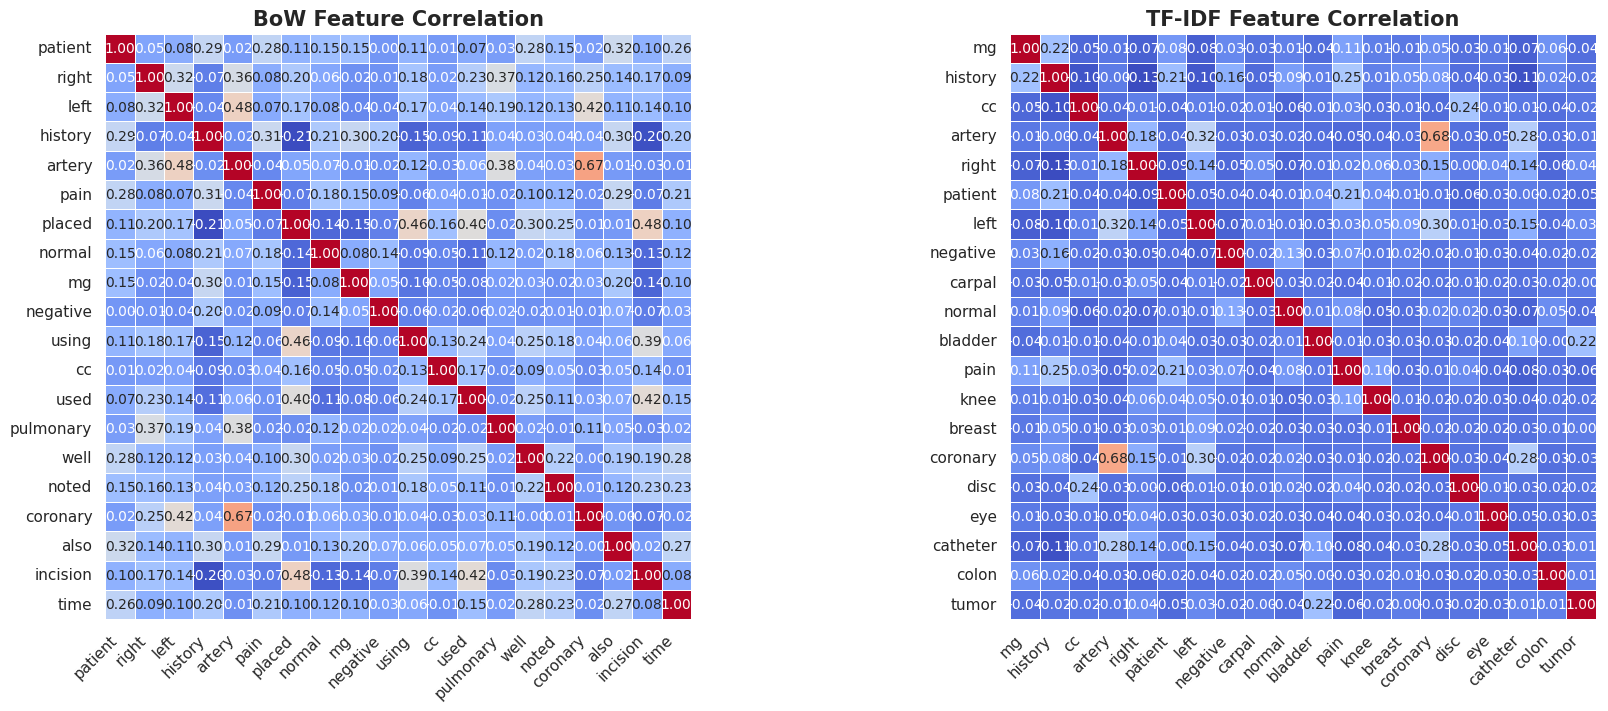

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming bow_df and tfidf_df are already created (from CountVectorizer/TfidfVectorizer)
# and converted to DataFrames

# Select top 20 features with highest variance (to reduce memory usage)
top_n = 20
bow_top_features = bow_df.var().sort_values(ascending=False).head(top_n).index
tfidf_top_features = tfidf_df.var().sort_values(ascending=False).head(top_n).index

# Compute correlation matrices for top features only
bow_corr = bow_df[bow_top_features].corr()
tfidf_corr = tfidf_df[tfidf_top_features].corr()

# Set plot style and layout
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(18, 7), constrained_layout=True)

# Function to create a heatmap
def plot_heatmap(corr_matrix, title, ax):
    sns.heatmap(
        corr_matrix, cmap="coolwarm", annot=True, fmt=".2f",
        linewidths=0.5, square=True, cbar=False,
        annot_kws={"size": 10}, ax=ax
    )
    ax.set_title(title, fontsize=15, fontweight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=11)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

# Plot heatmaps
plot_heatmap(bow_corr, "BoW Feature Correlation", axes[0])
plot_heatmap(tfidf_corr, "TF-IDF Feature Correlation", axes[1])

# Show the plot
plt.show()

In [27]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Sample data: Using your clinical text corpus
sentences = data["transcription"].apply(word_tokenize).tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [28]:
import fasttext
import fasttext.util
from gensim.models.fasttext import FastText

# Train fastText model
fasttext_model = FastText(sentences=data, vector_size=100, window=5, min_count=2, workers=4)

In [29]:
# Load GloVe embeddings (Change path accordingly)
glove_path = "/kaggle/input/glove-weights/glove.6B.100d.txt"

# Load GloVe word vectors into a dictionary
glove_embeddings = {}
with open(glove_path, "r", encoding="utf-8") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compare_embeddings(word):
    vectors = {}

    if word in word2vec_model.wv:
        vectors["Word2Vec"] = word2vec_model.wv[word]
    if word in glove_embeddings:
        vectors["GloVe"] = glove_embeddings[word]
    if word in fasttext_model.wv:
        vectors["fastText"] = fasttext_model.wv[word]

    # Convert to array
    labels, word_vectors = zip(*vectors.items())

    # Compute similarity
    similarities = cosine_similarity(word_vectors)

    # Display results
    print("\nCosine Similarity Matrix:")
    print(pd.DataFrame(similarities, index=labels, columns=labels))

compare_embeddings("patient")


Cosine Similarity Matrix:
          Word2Vec     GloVe  fastText
Word2Vec  1.000000  0.157557 -0.057658
GloVe     0.157557  1.000000 -0.089992
fastText -0.057658 -0.089992  1.000000


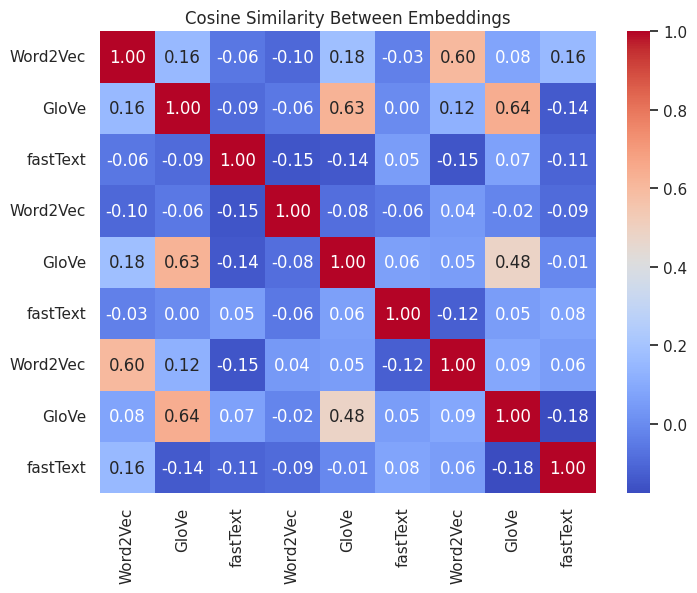

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize similarities
def plot_similarity_matrix(words):
    vectors = {word: [] for word in words}

    # Collect vectors for all words in each model
    for word in words:
        vectors[word].append(word2vec_model.wv[word] if word in word2vec_model.wv else np.zeros(100))
        vectors[word].append(glove_embeddings[word] if word in glove_embeddings else np.zeros(100))
        vectors[word].append(fasttext_model.wv[word] if word in fasttext_model.wv else np.zeros(100))

    labels = ["Word2Vec", "GloVe", "fastText"]
    matrix = np.array([vectors[word] for word in words])
    similarity_matrix = cosine_similarity(matrix.reshape(len(words) * 3, -1))

    plt.figure(figsize=(8, 6))
    sns.heatmap(similarity_matrix, annot=True, xticklabels=labels * len(words), yticklabels=labels * len(words), cmap="coolwarm", fmt=".2f")
    plt.title("Cosine Similarity Between Embeddings")
    plt.show()

# Compare similarity for 3 words
plot_similarity_matrix(["patient", "disease", "hospital"])

**Medical Embeddings**

ClinicalBERT

In [32]:
from transformers import AutoTokenizer, AutoModel

# ClinicalBERT model checkpoint
model_name = "emilyalsentzer/Bio_ClinicalBERT"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

E0000 00:00:1746366322.426134      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746366322.477589      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [33]:
import pandas as pd

# Load your cleaned dataset
data = pd.read_csv("/kaggle/working/mtsamples_cleaned.csv")  # e.g., "mtsamples_cleaned.csv"
transcriptions = data["transcription"].tolist()

In [34]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load ClinicalBERT
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model.eval()  # Set model to evaluation mode

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [35]:
def get_cls_embedding(text):
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # CLS token
    return cls_embedding

In [36]:
embeddings = []

for text in transcriptions:
    try:
        embedding = get_cls_embedding(text)
        embeddings.append(embedding)
    except Exception as e:
        print("Error processing:", text[:50])
        embeddings.append(None)

In [37]:
import numpy as np
filtered_embeddings = [e for e in embeddings if e is not None]
np.save("clinicalbert_embeddings.npy", filtered_embeddings)

SciBERT

In [38]:
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")
model.eval()  # Set model to evaluation mode

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31090, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [39]:
from tqdm.notebook import tqdm
tqdm.pandas()
def get_scibert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # [CLS] token
    return cls_embedding.squeeze().numpy()

# Apply embeddings to transcriptions
tqdm.pandas()
data["scibert_embedding"] = data["transcription"].progress_apply(get_scibert_embedding)

  0%|          | 0/4966 [00:00<?, ?it/s]

In [40]:
import numpy as np
np.save("scibert_embeddings.npy", data["scibert_embedding"].values)

BioBERT

In [41]:
from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm

# Load tokenizer and model for BioBERT
tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-base-cased-v1.2")
model = AutoModel.from_pretrained("dmis-lab/biobert-base-cased-v1.2")
model.eval()

# Define embedding function
def get_biobert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token
    return cls_embedding.squeeze().numpy()

# Apply to dataset
tqdm.pandas()
data["biobert_embedding"] = data["transcription"].progress_apply(get_biobert_embedding)

# Save embeddings as .npy
np.save("biobert_embeddings.npy", data["biobert_embedding"].values)

config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

  0%|          | 2/4966 [00:00<08:14, 10.05it/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

100%|██████████| 4966/4966 [27:32<00:00,  3.00it/s]


In [42]:
# Load .npy embedding arrays
biobert_embeddings = np.load("biobert_embeddings.npy", allow_pickle=True)
scibert_embeddings = np.load("scibert_embeddings.npy", allow_pickle=True)
clinicalbert_embeddings = np.load("clinicalbert_embeddings.npy", allow_pickle=True)

biobert_embeddings = np.stack(biobert_embeddings)
scibert_embeddings = np.stack(scibert_embeddings)
clinicalbert_embeddings = np.stack(clinicalbert_embeddings)

In [43]:
print("BioBERT shape:", biobert_embeddings.shape)
print("SciBERT shape:", scibert_embeddings.shape)
print("ClinicalBERT shape:", clinicalbert_embeddings.shape)

BioBERT shape: (4966, 768)
SciBERT shape: (4966, 768)
ClinicalBERT shape: (4966, 768)


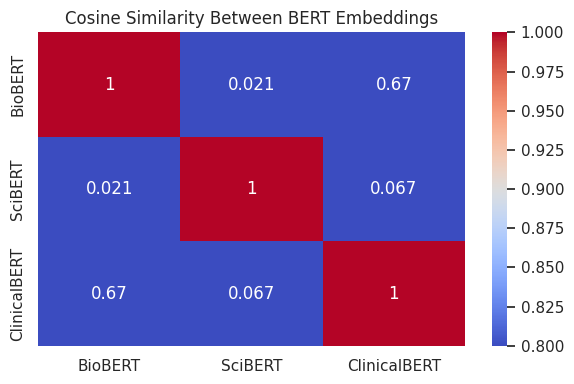

In [44]:
bio_avg = biobert_embeddings.mean(axis=0)
sci_avg = scibert_embeddings.mean(axis=0)
clin_avg = clinicalbert_embeddings.mean(axis=0)

embeddings_matrix = np.stack([bio_avg, sci_avg, clin_avg])

# Compute cosine similarity between each pair
similarity_matrix = cosine_similarity(embeddings_matrix)

# Create a DataFrame for heatmap
labels = ['BioBERT', 'SciBERT', 'ClinicalBERT']
similarity_df = pd.DataFrame(similarity_matrix, index=labels, columns=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(similarity_df, annot=True, cmap="coolwarm", vmin=0.8, vmax=1.0)
plt.title("Cosine Similarity Between BERT Embeddings")
plt.tight_layout()
plt.show()

In [45]:
# Compare embeddings for the same sample across models
bio_sci_sim = np.mean([cosine_similarity(bio.reshape(1, -1), sci.reshape(1, -1))[0][0]
                       for bio, sci in zip(biobert_embeddings, scibert_embeddings)])

bio_clinical_sim = np.mean([cosine_similarity(bio.reshape(1, -1), clin.reshape(1, -1))[0][0]
                            for bio, clin in zip(biobert_embeddings, clinicalbert_embeddings)])

sci_clinical_sim = np.mean([cosine_similarity(sci.reshape(1, -1), clin.reshape(1, -1))[0][0]
                            for sci, clin in zip(scibert_embeddings, clinicalbert_embeddings)])

print(f"Average Cosine Similarity (BioBERT vs SciBERT): {bio_sci_sim:.4f}")
print(f"Average Cosine Similarity (BioBERT vs ClinicalBERT): {bio_clinical_sim:.4f}")
print(f"Average Cosine Similarity (SciBERT vs ClinicalBERT): {sci_clinical_sim:.4f}")

Average Cosine Similarity (BioBERT vs SciBERT): 0.0186
Average Cosine Similarity (BioBERT vs ClinicalBERT): 0.6308
Average Cosine Similarity (SciBERT vs ClinicalBERT): 0.0558


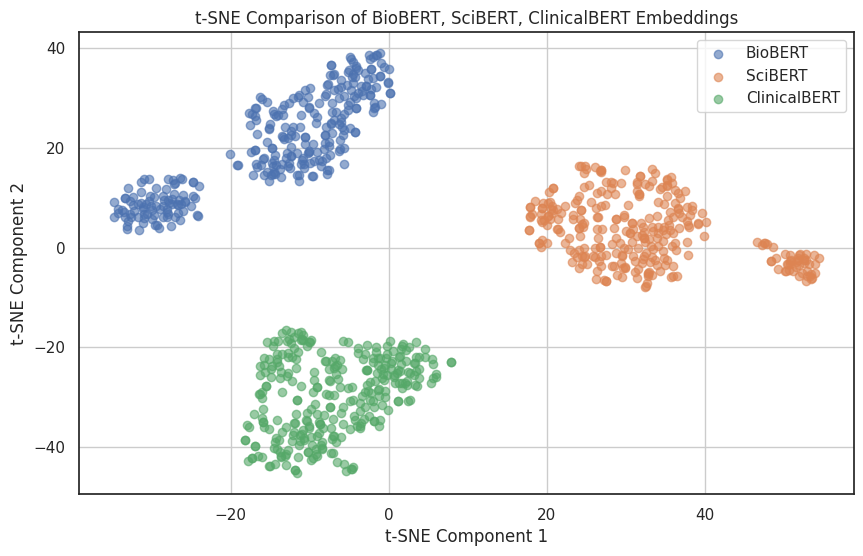

In [46]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensionality
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

# Stack embeddings for comparison
all_embeddings = np.concatenate([
    biobert_embeddings[:300], 
    scibert_embeddings[:300], 
    clinicalbert_embeddings[:300]
])

# Fit t-SNE
tsne_result = tsne.fit_transform(all_embeddings)

# Prepare labels
labels = (["BioBERT"] * 300) + (["SciBERT"] * 300) + (["ClinicalBERT"] * 300)

# Plot
plt.figure(figsize=(10, 6))
for label in set(labels):
    idx = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], label=label, alpha=0.6)

plt.legend()
plt.title("t-SNE Comparison of BioBERT, SciBERT, ClinicalBERT Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

**Medical Based Named Entity Recognition**

Med-7 NER

In [47]:
!pip install "en-core-med7-lg @ https://huggingface.co/kormilitzin/en_core_med7_lg/resolve/main/en_core_med7_lg-any-py3-none-any.whl"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.4/607.4 MB 1.6 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 83.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 87.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.4/917.4 kB 48.7 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled typer-0.15.1
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-

In [48]:
# Load your cleaned dataset (update path as needed)
data = pd.read_csv("/kaggle/working/mtsamples_cleaned.csv")  # <- Make sure this file exists in your working directory

# Load Med7 model (you must have installed en_core_med7_lg already)
med7 = spacy.load("en_core_med7_lg")

# Apply Med7 to extract entities from 'transcription' column
entity_texts = []
entity_labels = []

for doc in med7.pipe(data["transcription"].astype(str), batch_size=32):
    ents = [(ent.text, ent.label_) for ent in doc.ents]
    entity_texts.append([ent[0] for ent in ents])
    entity_labels.append([ent[1] for ent in ents])

# Store results into new columns
data["med7_entity_texts"] = entity_texts
data["med7_entity_labels"] = entity_labels

# Save the result to a new CSV
data.to_csv("/kaggle/working/mtsamples_with_med7_entities.csv", index=False)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_med7_lg' (3.4.2.1) was trained with spaCy v3.4.2 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


In [49]:
data = pd.read_csv("/kaggle/working/mtsamples_with_med7_entities.csv")
print(data[["transcription", "med7_entity_texts", "med7_entity_labels"]].head())

                                       transcription  \
0  subjective yearold white female presents compl...   
1  past medical history difficulty climbing stair...   
2  history present illness seen abc today pleasan...   
3  mmode left atrial enlargement left atrial diam...   
4  left ventricular cavity size wall thickness ap...   

                                   med7_entity_texts  \
0  ['claritin', 'zyrtec', 'nasal', 'sprays', 'dai...   
1                               ['three times week']   
2  ['diovan crestor tricormiscellaneouseating his...   
3                                                 []   
4                                                 []   

                                  med7_entity_labels  
0  ['DRUG', 'DRUG', 'ROUTE', 'FORM', 'FREQUENCY',...  
1                                      ['FREQUENCY']  
2                              ['DRUG', 'FREQUENCY']  
3                                                 []  
4                                                 [

Medical NER

In [50]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Load your dataset
data = pd.read_csv("/kaggle/working/mtsamples_cleaned.csv")  # ← replace with your dataset path

# Load the MedicalNER pipeline
ner_pipeline = pipeline("token-classification", model="Clinical-AI-Apollo/Medical-NER", aggregation_strategy='simple')

# Initialize columns
medicalner_texts = []
medicalner_labels = []

# Loop through each transcription
for text in tqdm(data['transcription'].fillna('')):
    try:
        result = ner_pipeline(text)
        entities = [ent['word'] for ent in result]
        labels = [ent['entity_group'] for ent in result]
    except:
        entities = []
        labels = []

    medicalner_texts.append(entities)
    medicalner_labels.append(labels)

# Save to new columns in dataframe
data['medicalner_entity_texts'] = medicalner_texts
data['medicalner_entity_labels'] = medicalner_labels

# Save to CSV
data.to_csv("/kaggle/working/medicalner_features.csv", index=False)
print("Feature extraction completed and saved.")

config.json:   0%|          | 0.00/5.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/736M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

Device set to use cuda:0
100%|██████████| 4966/4966 [03:47<00:00, 21.79it/s]


Feature extraction completed and saved.


In [51]:
data = pd.read_csv("/kaggle/working/medicalner_features.csv")
print(data[["transcription", "medicalner_entity_texts", "medicalner_entity_labels"]].head())

                                       transcription  \
0  subjective yearold white female presents compl...   
1  past medical history difficulty climbing stair...   
2  history present illness seen abc today pleasan...   
3  mmode left atrial enlargement left atrial diam...   
4  left ventricular cavity size wall thickness ap...   

                             medicalner_entity_texts  \
0  ['subjective', 'year', 'old', 'white', 'female...   
1  ['difficulty', 'climbing stairs difficulty air...   
2  ['illness seen abc today', 'pleasant gentleman...   
3  ['mmode', 'left atrial enlargement', 'left', '...   
4  ['left ventricular cavity size', 'wall thickne...   

                            medicalner_entity_labels  
0  ['DETAILED_DESCRIPTION', 'BIOLOGICAL_STRUCTURE...  
1  ['SIGN_SYMPTOM', 'HISTORY', 'DETAILED_DESCRIPT...  
2  ['HISTORY', 'FAMILY_HISTORY', 'DETAILED_DESCRI...  
3  ['LAB_VALUE', 'SIGN_SYMPTOM', 'LAB_VALUE', 'SI...  
4  ['DIAGNOSTIC_PROCEDURE', 'DIAGNOSTIC_PROCEDURE..

In [52]:
import pandas as pd
from ast import literal_eval

# Load Med7 output
med7_data = pd.read_csv("/kaggle/working/mtsamples_with_med7_entities.csv")

# Load MedicalNER output
medicalner_data = pd.read_csv("/kaggle/working/medicalner_features.csv")

# Merge them based on 'transcription' text
data = pd.merge(med7_data, medicalner_data, on="transcription", how="inner")

# Now fix the stringified lists (because CSV saves lists as strings)
data["med7_entity_labels"] = data["med7_entity_labels"].apply(literal_eval)
data["medicalner_entity_labels"] = data["medicalner_entity_labels"].apply(literal_eval)

print(data.head())

                                       transcription    medical_specialty_x  \
0  subjective yearold white female presents compl...   Allergy / Immunology   
1  subjective yearold white female presents compl...   Allergy / Immunology   
2  past medical history difficulty climbing stair...             Bariatrics   
3  past medical history difficulty climbing stair...             Bariatrics   
4  history present illness seen abc today pleasan...             Bariatrics   

                                          keywords_x  sentence_length_x  \
0  allergy  immunology allergic rhinitis allergie...                204   
1  allergy  immunology allergic rhinitis allergie...                204   
2  bariatrics laparoscopic gastric bypass weight ...                350   
3  bariatrics laparoscopic gastric bypass weight ...                350   
4  bariatrics laparoscopic gastric bypass heart a...                716   

                                   med7_entity_texts  \
0  ['claritin', 'z

In [53]:
columns_to_drop = [
    'medical_specialty_y', 'keywords_y',
    'sentence_length_y'
]

data = data.drop(columns=columns_to_drop)
print(data.head())

                                       transcription    medical_specialty_x  \
0  subjective yearold white female presents compl...   Allergy / Immunology   
1  subjective yearold white female presents compl...   Allergy / Immunology   
2  past medical history difficulty climbing stair...             Bariatrics   
3  past medical history difficulty climbing stair...             Bariatrics   
4  history present illness seen abc today pleasan...             Bariatrics   

                                          keywords_x  sentence_length_x  \
0  allergy  immunology allergic rhinitis allergie...                204   
1  allergy  immunology allergic rhinitis allergie...                204   
2  bariatrics laparoscopic gastric bypass weight ...                350   
3  bariatrics laparoscopic gastric bypass weight ...                350   
4  bariatrics laparoscopic gastric bypass heart a...                716   

                                   med7_entity_texts  \
0  ['claritin', 'z

In [54]:
data = data.rename(columns={
    "medical_specialty_x": "medical_specialty",
    "keywords_x": "keywords",
    "sentence_length_x": "sentence_length"
})

print(data.columns)

Index(['transcription', 'medical_specialty', 'keywords', 'sentence_length',
       'med7_entity_texts', 'med7_entity_labels', 'medicalner_entity_texts',
       'medicalner_entity_labels'],
      dtype='object')


In [55]:
data.to_csv("/kaggle/working/dataset.csv", index=False)
print(data.head())

                                       transcription      medical_specialty  \
0  subjective yearold white female presents compl...   Allergy / Immunology   
1  subjective yearold white female presents compl...   Allergy / Immunology   
2  past medical history difficulty climbing stair...             Bariatrics   
3  past medical history difficulty climbing stair...             Bariatrics   
4  history present illness seen abc today pleasan...             Bariatrics   

                                            keywords  sentence_length  \
0  allergy  immunology allergic rhinitis allergie...              204   
1  allergy  immunology allergic rhinitis allergie...              204   
2  bariatrics laparoscopic gastric bypass weight ...              350   
3  bariatrics laparoscopic gastric bypass weight ...              350   
4  bariatrics laparoscopic gastric bypass heart a...              716   

                                   med7_entity_texts  \
0  ['claritin', 'zyrtec', 'nas

=== Med7 Performance ===
Precision: 0.0339
Recall: 0.0096
F1-Score: 0.0146

=== MedicalNER Performance ===
Precision: 0.0096
Recall: 0.0339
F1-Score: 0.0146


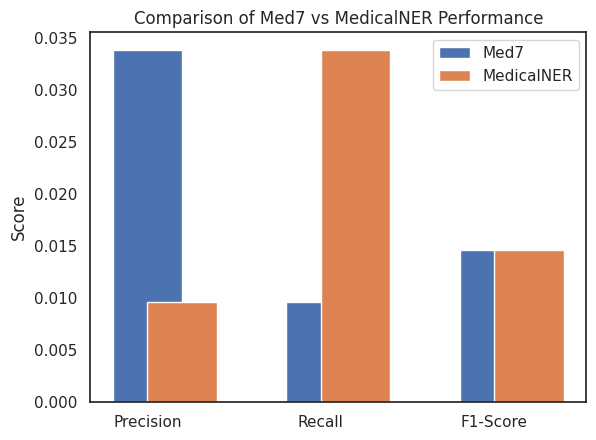

In [56]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from ast import literal_eval

# Load your dataset
data = pd.read_csv("/kaggle/working/dataset.csv")  # Update this with your file path

# Ensure the 'med7_entity_labels' and 'medicalner_entity_labels' columns are lists
data['med7_entity_labels'] = data['med7_entity_labels'].apply(literal_eval)
data['medicalner_entity_labels'] = data['medicalner_entity_labels'].apply(literal_eval)

# Initialize empty lists to store precision, recall, and f1 scores
med7_precision, med7_recall, med7_f1, _ = [], [], [], []
medicalner_precision, medicalner_recall, medicalner_f1, _ = [], [], [], []

# Loop through each row to compute performance metrics
for idx, row in data.iterrows():
    med7_entities = row['med7_entity_labels']
    medicalner_entities = row['medicalner_entity_labels']

    # True positives (TP): common entities between both methods
    common_entities = set(med7_entities).intersection(set(medicalner_entities))
    
    # Precision, Recall, F1 for Med7
    tp_med7 = len(common_entities)  # True positives for Med7
    fp_med7 = len(set(med7_entities) - common_entities)  # False positives for Med7
    fn_med7 = len(set(medicalner_entities) - common_entities)  # False negatives for Med7

    precision_med7 = tp_med7 / (tp_med7 + fp_med7) if tp_med7 + fp_med7 > 0 else 0
    recall_med7 = tp_med7 / (tp_med7 + fn_med7) if tp_med7 + fn_med7 > 0 else 0
    f1_med7 = 2 * (precision_med7 * recall_med7) / (precision_med7 + recall_med7) if precision_med7 + recall_med7 > 0 else 0

    # Precision, Recall, F1 for MedicalNER
    tp_medicalner = len(common_entities)  # True positives for MedicalNER
    fp_medicalner = len(set(medicalner_entities) - common_entities)  # False positives for MedicalNER
    fn_medicalner = len(set(med7_entities) - common_entities)  # False negatives for MedicalNER

    precision_medicalner = tp_medicalner / (tp_medicalner + fp_medicalner) if tp_medicalner + fp_medicalner > 0 else 0
    recall_medicalner = tp_medicalner / (tp_medicalner + fn_medicalner) if tp_medicalner + fn_medicalner > 0 else 0
    f1_medicalner = 2 * (precision_medicalner * recall_medicalner) / (precision_medicalner + recall_medicalner) if precision_medicalner + recall_medicalner > 0 else 0

    # Append to the lists
    med7_precision.append(precision_med7)
    med7_recall.append(recall_med7)
    med7_f1.append(f1_med7)

    medicalner_precision.append(precision_medicalner)
    medicalner_recall.append(recall_medicalner)
    medicalner_f1.append(f1_medicalner)

# Calculate average performance metrics for each model
avg_precision_med7 = sum(med7_precision) / len(med7_precision)
avg_recall_med7 = sum(med7_recall) / len(med7_recall)
avg_f1_med7 = sum(med7_f1) / len(med7_f1)

avg_precision_medicalner = sum(medicalner_precision) / len(medicalner_precision)
avg_recall_medicalner = sum(medicalner_recall) / len(medicalner_recall)
avg_f1_medicalner = sum(medicalner_f1) / len(medicalner_f1)

# Output the results
print("=== Med7 Performance ===")
print(f"Precision: {avg_precision_med7:.4f}")
print(f"Recall: {avg_recall_med7:.4f}")
print(f"F1-Score: {avg_f1_med7:.4f}")

print("\n=== MedicalNER Performance ===")
print(f"Precision: {avg_precision_medicalner:.4f}")
print(f"Recall: {avg_recall_medicalner:.4f}")
print(f"F1-Score: {avg_f1_medicalner:.4f}")

# Optional: if you want to visualize the metrics (e.g., via bar plot)
import matplotlib.pyplot as plt

labels = ['Precision', 'Recall', 'F1-Score']
med7_scores = [avg_precision_med7, avg_recall_med7, avg_f1_med7]
medicalner_scores = [avg_precision_medicalner, avg_recall_medicalner, avg_f1_medicalner]

x = range(len(labels))

plt.bar(x, med7_scores, width=0.4, label='Med7', align='center')
plt.bar(x, medicalner_scores, width=0.4, label='MedicalNER', align='edge')
plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Comparison of Med7 vs MedicalNER Performance')
plt.legend()
plt.show()

In [57]:
# Example to examine the number of entities extracted by each model
data['med7_entity_count'] = data['med7_entity_labels'].apply(len)
data['medicalner_entity_count'] = data['medicalner_entity_labels'].apply(len)

print(data[['transcription', 'med7_entity_count', 'medicalner_entity_count']].head())

                                       transcription  med7_entity_count  \
0  subjective yearold white female presents compl...                 13   
1  subjective yearold white female presents compl...                 13   
2  past medical history difficulty climbing stair...                  1   
3  past medical history difficulty climbing stair...                  1   
4  history present illness seen abc today pleasan...                  2   

   medicalner_entity_count  
0                       49  
1                       49  
2                      110  
3                      110  
4                      178  


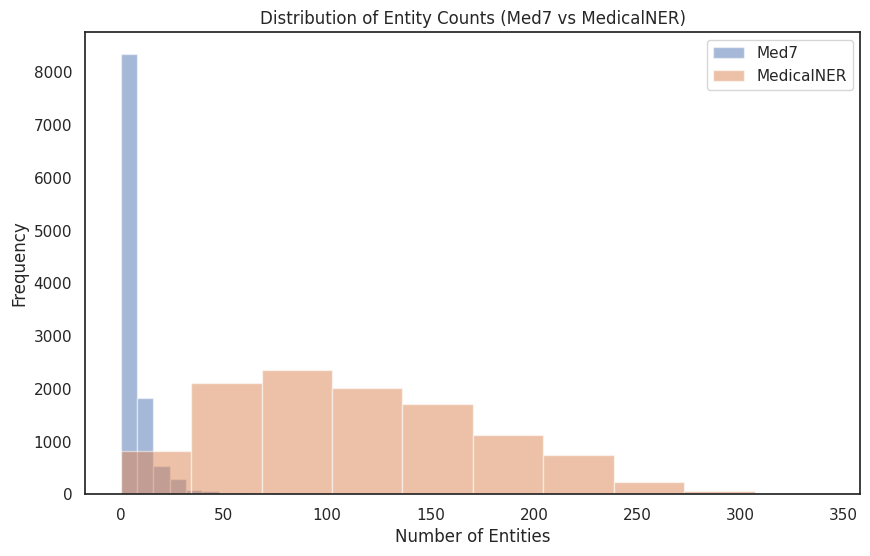

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(data['med7_entity_count'], alpha=0.5, label='Med7')
plt.hist(data['medicalner_entity_count'], alpha=0.5, label='MedicalNER')
plt.legend()
plt.title('Distribution of Entity Counts (Med7 vs MedicalNER)')
plt.xlabel('Number of Entities')
plt.ylabel('Frequency')
plt.show()

In [59]:
# Check the unique labels of each model
med7_labels = set([label for sublist in data['med7_entity_labels'] for label in sublist])
medicalner_labels = set([label for sublist in data['medicalner_entity_labels'] for label in sublist])

print("Unique Med7 Labels:", med7_labels)
print("Unique MedicalNER Labels:", medicalner_labels)

Unique Med7 Labels: {'DRUG', 'DURATION', 'DOSAGE', 'FREQUENCY', 'ROUTE', 'FORM', 'STRENGTH'}
Unique MedicalNER Labels: {'DIAGNOSTIC_PROCEDURE', 'DISTANCE', 'SEX', 'LAB_VALUE', 'HISTORY', 'TIME', 'COREFERENCE', 'DETAILED_DESCRIPTION', 'DURATION', 'FAMILY_HISTORY', 'OUTCOME', 'OTHER_ENTITY', 'SIGN_SYMPTOM', 'AREA', 'BIOLOGICAL_STRUCTURE', 'ADMINISTRATION', 'CLINICAL_EVENT', 'DATE', 'THERAPEUTIC_PROCEDURE', 'NONBIOLOGICAL_LOCATION', 'AGE', 'PERSONAL_BACKGROUND', 'DOSAGE', 'MEDICATION', 'SEVERITY', 'DISEASE_DISORDER'}
